# Python for Data Analysis - Final Projet

##### By Samuel Pariente and Marius Ortega

In [31]:
user = "marius" #Values : marius || samuel

## Libraries

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd

In [9]:
import seaborn as sns

In [10]:
from matplotlib import pyplot as plt

In [11]:
import matplotlib.colors as plt_colors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
import numpy as np

In [14]:
from datetime import datetime, timedelta

In [15]:
import plotly.graph_objects as go

In [16]:
from plotly.subplots import make_subplots

In [17]:
from gensim.models import KeyedVectors

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [18]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ARDRegression
from sklearn.model_selection import cross_validate,learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [83]:
from yellowbrick.model_selection import LearningCurve

In [88]:
!pip install auto-sklearn
import autosklearn
import autosklearn.classification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import plotly.express as px

In [22]:
from collections import OrderedDict

In [23]:
!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, transform
output_notebook()

In [25]:
from bokeh.palettes import Spectral5
from bokeh.palettes import PRGn7
from bokeh.palettes import Magma7
from bokeh.palettes import Viridis
from bokeh.palettes import Pastel2_7
from bokeh.palettes import Purples9
from bokeh.palettes import Greens9
from bokeh.palettes import YlOrRd9

In [26]:
from wordcloud import WordCloud
from PIL import Image

In [27]:
from missingno import matrix

In [28]:
!pip install bar_chart_race
import bar_chart_race as bcr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout

In [30]:
import warnings

In [ ]:
import pickle
import flask
from flask import Flask, request

## Paths

In [32]:
vecto_path_marius = r"/content/drive/MyDrive/SWITCH/Python for Data Analysis/Projet Final/DataFrames/GoogleNews-vectors-negative300.bin"
online_news_popularity_path_marius = r"/content/drive/MyDrive/SWITCH/Python for Data Analysis/Projet Final/DataFrames/OnlineNewsPopularityWithAutorsAndTitles.csv"
multi_timeline_path_marius = r"/content/drive/MyDrive/SWITCH/Python for Data Analysis/Projet Final/DataFrames/multiTimeline.csv"
mlogo_path_marius = r"/content/drive/MyDrive/SWITCH/Python for Data Analysis/Projet Final/DataFrames/Mlogo.png"

In [33]:
vecto_path_samuel = r"C:/Users/samue/OneDrive/Bureau/esilv/python final project/GoogleNews-vectors-negative300.bin"
online_news_popularity_path_samuel = r"/content/drive/MyDrive/pyhton/OnlineNewsPopularityWithAutorsAndTitles.csv"
multi_timeline_path_samuel = r"/content/drive/MyDrive/pyhton/multiTimeline.csv"
mlogo_path_samuel = r"/content/drive/MyDrive/pyhton/Mlogo.png"

In [34]:
if user == "marius":
  vecto_path = vecto_path_marius
  online_news_popularity_path = online_news_popularity_path_marius
  multi_timeline_path = multi_timeline_path_marius
  mlogo_path = mlogo_path_marius
elif user == "samuel":
  vecto_path = vecto_path_samuel
  online_news_popularity_path = online_news_popularity_path_samuel
  multi_timeline_path = multi_timeline_path_samuel
  mlogo_path = mlogo_path_samuel

## Datasets

### News Dataset

In [35]:
news = pd.read_csv(online_news_popularity_path)
news.head(5)

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...         731   
1  http://mashable.com/2013/01/07/ap-samsung-spon...         731   
2  http://mashable.com/2013/01/07/apple-40-billio...         731   
3  http://mashable.com/2013/01/07/astronaut-notre...         731   
4   http://mashable.com/2013/01/07/att-u-verse-apps/         731   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0               12                219          0.663594                1.0   
1                9                255          0.604743                1.0   
2                9                211          0.575130                1.0   
3                9                531          0.503788                1.0   
4               13               1072          0.415646                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385           4                2          1  ...   
1                   0.791946           3                1          1  ...   
2                   0.663866           3                1          1  ...   
3                   0.665635           9                0          1  ...   
4                   0.540890          19               19         20  ...   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0               -0.350000                  -0.600               -0.200000   
1               -0.118750                  -0.125               -0.100000   
2               -0.466667                  -0.800               -0.133333   
3               -0.369697                  -0.600               -0.166667   
4               -0.220192                  -0.500               -0.050000   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0             0.500000                  -0.187500                 0.000000   
1             0.000000                   0.000000                 0.500000   
2             0.000000                   0.000000                 0.500000   
3             0.000000                   0.000000                 0.500000   
4             0.454545                   0.136364                 0.045455   

    abs_title_sentiment_polarity   shares         Authors  \
0                       0.187500      593   Lauren Indvik   
1                       0.000000      711  Seth Fiegerman   
2                       0.000000     1500  Seth Fiegerman   
3                       0.000000     1200       Space.com   
4                       0.136364      505     Emily Price   

                                              Titles  
0  Amazon's Streaming Video Library Now a Little ...  
1  AP's Twitter to Begin Displaying Sponsored Tweets  
2      Apple's App Store Passes 40 Billion Downloads  
3   This Astronaut Is Rooting for Notre Dame Tonight  
4  New U-Verse Apps Simplify Sharing Photos and V...  

[5 rows x 63 columns]

In [36]:
timeline = pd.read_csv(multi_timeline_path)
timeline.head(5)

Semaine  Mashable: (Dans tous les pays)
0  2013-01-06                              58
1  2013-01-13                              61
2  2013-01-20                              56
3  2013-01-27                              58
4  2013-02-03                              57

#### Initial Columns descriptions

0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

In [37]:
news.shape

(39644, 63)

## 1 - Data Pre-processing

### 1.1 - Scrapping & Addition of Columns

Before we start, we notice that all columns names have a space before them. We remove them.

In [38]:
columns = news.columns
oldColumns = columns
columns = [elem.lstrip() for elem in columns]
dic_cols = {oldColumns[i]:columns[i] for i in range(len(columns))}
news.rename(columns=dic_cols, inplace=True)

##### Scrapping of Titles and Authors

In [39]:
scrap = False

In [40]:
if scrap:
    urls = news["url"]
    driver = webdriver.Chrome('chromedriver.exe')

    driver.get(urls[0])
    time.sleep(2)
    element = driver.find_elements(by = By.CSS_SELECTOR, value = 'div[id="onetrust-button-group"]')
    element[0].click()
    authors = []
    titles = []

    authors = []
    titles = []
    for i in range(0, len(urls[i])):
        driver.get(urls[i])
        time.sleep(0.5)
        try : 
            timer1 = WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CSS_SELECTOR,'a[class="underline-link"]')))
            timer2 = WebDriverWait(driver, 2).until(EC.presence_of_element_located((By.CSS_SELECTOR,'h1[class="mt-4 header-100 max-w-5xl "]')))
            name = driver.find_elements(by = By.CSS_SELECTOR, value = 'a[class="underline-link"]')
            title = driver.find_elements(by = By.CSS_SELECTOR, value = 'h1[class="mt-4 header-100 max-w-5xl "]')

            authors.append(name[0].text)
            titles.append(title[0].text)

        except (TimeoutException , NameError):
            authors.append('Nan')
            titles.append('Nan')
    news['Autors'] = authors
    news['titles'] = titles
    df.to_csv('OnlineNewsPopularityWithAutorsAndTitles.csv')

##### Addition of Data of release column

In [41]:
time = [x for x in range(8,732)]

temp = datetime.strptime("27/12/2014",'%d/%m/%Y')
date = []
for i in range(len(time)):
    date.append(temp)
    temp = temp - timedelta(1)

dico = {time[i]:date[i] for i in range(len(time))}
news['date'] = news['timedelta'].map(dico)

##### Addition of Timeline column

In [42]:
days = timeline['Semaine']
count = timeline['Mashable: (Dans tous les pays)']
days1 = []
for day in days:
    days1.append(datetime.strptime(day,'%Y-%m-%d'))

days2 = []
count1 = [] 
days2.append(datetime.strptime('2013-01-03','%Y-%m-%d'))
days2.append(datetime.strptime('2013-01-04','%Y-%m-%d'))
days2.append(datetime.strptime('2013-01-05','%Y-%m-%d'))
count1.append(8.28)
count1.append(8.28)
count1.append(8.28)
for day in days1:
    for i in range(7):
        days2.append(day + timedelta(i))

for coun in count:
    for i in range(7):
        count1.append(coun/7)
count1.append(4.7)
count1.append(4.7)
count1.append(4.7)
count1.append(4.7)
count1.append(4.7)
count1.append(4.7)
days2.append(datetime.strptime('2014-12-22','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-23','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-24','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-25','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-26','%Y-%m-%d'))
days2.append(datetime.strptime('2014-12-27','%Y-%m-%d'))
dico = {str(days2[i])[:10]:count1[i] for i in range(len(days2))}
news['NbVisit'] = news['date'].astype(str).map(dico)

##### Discretization of target variable

In [80]:
Class_shares2 = pd.qcut(m_news.shares,4,
       labels=['very low','low' ,'high', 'very high'])
Class_shares1 = np.where(m_news['shares'] < 1400, 'low','high')

m_news['Class_shares1'] = Class_shares1
m_news['Class_shares2'] = Class_shares2

### 1.2 - Cleaning

In the first place, let's study na proportions in news dataframe.

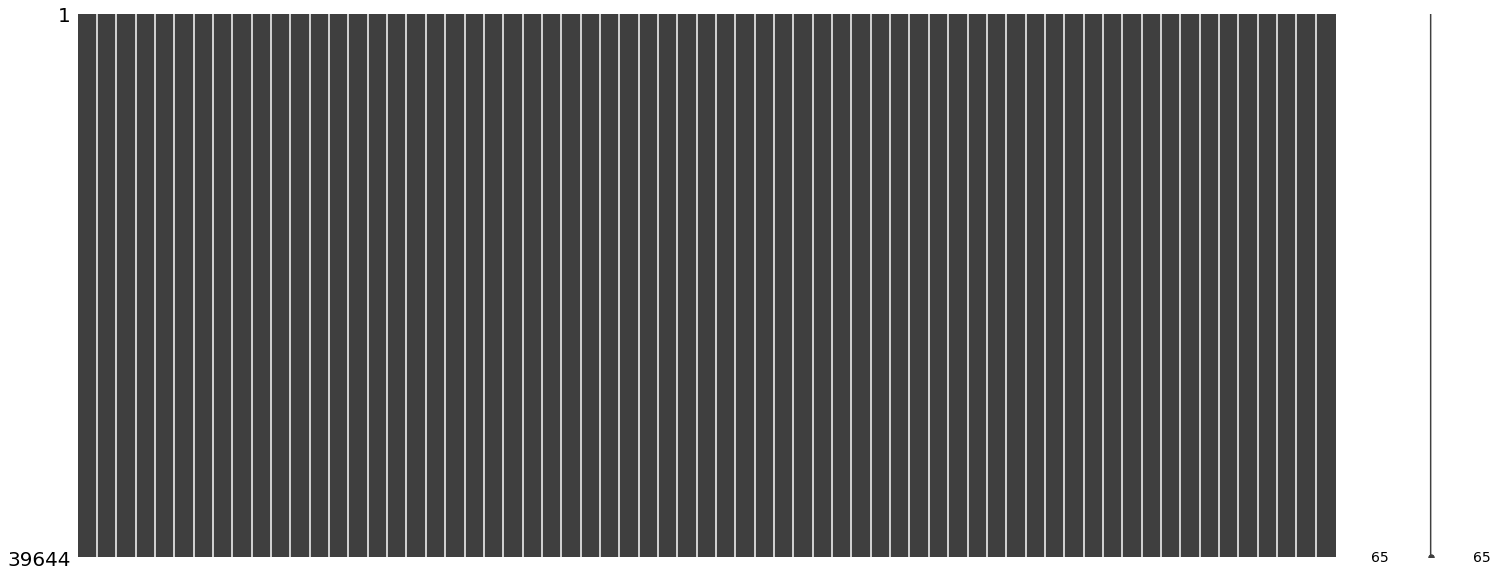

In [43]:
_=matrix(news)

There are no trivial na in our dataframe. 

##### Column 2 to 6 : Tokens

Now, we will drop articles that don't have a content

In [44]:
news = news[news["n_tokens_content"]>0]

Columns 4 to 6 are ratios. We must verify that all values lie between 0 and 1.

In [45]:
for i in range(4, 7): 
    news = news[((news.iloc[:, i] >= 0) & (news.iloc[:, i] <=1))]

##### Column 13 to 18 : News Chanels

News Chanels columns are 1hot encoded. Ultimately, we want to vectorize these columns. Thus, we must tranform them to actual words by decoding them.

In [46]:
summary_13_to_18 = []
for index in range(news.shape[0]):
    if news.iloc[index, 13] == 1:
        summary_13_to_18.append("LifeStyle")
    elif news.iloc[index, 14] == 1:
        summary_13_to_18.append("Entertainment")
    elif news.iloc[index, 15] == 1:
        summary_13_to_18.append("Business")
    elif news.iloc[index, 16] == 1:
        summary_13_to_18.append("Social Media")
    elif news.iloc[index, 17] == 1:
        summary_13_to_18.append("Tech")
    elif news.iloc[index, 18] == 1:
        summary_13_to_18.append("World")
    else:
        summary_13_to_18.append("Others")
news["Chanel"] = summary_13_to_18

##### Columns 19 to 27 : Keywords

Columns 19 to 27 represent numbers of shares, thus we must verify if there are any negative values. If we find any, we equal them to 0.

In [47]:
for i in range(19, 28):
    news.iloc[:, i] = [x if x>=0 else 0 for x in news.iloc[:, i]]

##### Columns 31 to 37

Same operations than columns 13 to 18

In [48]:
summary_31_to_37 = []
for index in range(news.shape[0]):
    if news.iloc[index, 31] == 1:
        summary_31_to_37.append("Monday")
    elif news.iloc[index, 32] == 1:
        summary_31_to_37.append("Tuesday")
    elif news.iloc[index, 33] == 1:
        summary_31_to_37.append("Wednesday")
    elif news.iloc[index, 34] == 1:
        summary_31_to_37.append("Thursday")
    elif news.iloc[index, 35] == 1:
        summary_31_to_37.append("Friday")
    elif news.iloc[index, 36] == 1:
        summary_31_to_37.append("Saturday")
    elif news.iloc[index, 37] == 1:
        summary_31_to_37.append("Sunday")
    else:
        summary_31_to_37.append("Unknown")
news["Weekday"] = summary_31_to_37 

##### Columns 39 to 43 : Latent Dirichelet Allocation Topics

These columns are ratios, we verify if they all lie between 0 and 1.

In [49]:
print(f'LDA_00 : {(news[(news["LDA_00"]<0) | (news["LDA_00"]<0)].url.count())}')
print(f'LDA_01 : {(news[(news["LDA_01"]<0) | (news["LDA_01"]<0)].url.count())}')
print(f'LDA_02 : {(news[(news["LDA_02"]<0) | (news["LDA_02"]<0)].url.count())}')
print(f'LDA_03 : {(news[(news["LDA_03"]<0) | (news["LDA_03"]<0)].url.count())}')

LDA_00 : 0
LDA_01 : 0
LDA_02 : 0
LDA_03 : 0


In [50]:
news[(news["LDA_03"].isna() == True)]

Empty DataFrame
Columns: [url, timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens, num_hrefs, num_self_hrefs, num_imgs, num_videos, average_token_length, num_keywords, data_channel_is_lifestyle, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_socmed, data_channel_is_tech, data_channel_is_world, kw_min_min, kw_max_min, kw_avg_min, kw_min_max, kw_max_max, kw_avg_max, kw_min_avg, kw_max_avg, kw_avg_avg, self_reference_min_shares, self_reference_max_shares, self_reference_avg_sharess, weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, weekday_is_saturday, weekday_is_sunday, is_weekend, LDA_00, LDA_01, LDA_02, LDA_03, LDA_04, global_subjectivity, global_sentiment_polarity, global_rate_positive_words, global_rate_negative_words, rate_positive_words, rate_negative_words, avg_positive_polarity, min_positive_polarity, max_positive_polarity, avg_negative_polarity, min_negative_polarity, max_negative_polarity, title_subjectivity, title_sentiment_polarity, abs_title_subjectivity, abs_title_sentiment_polarity, shares, Authors, Titles, date, NbVisit, Chanel, Weekday]
Index: []

[0 rows x 67 columns]

##### Column 60 : Shares (target)

Some articles might have especially high numbers of shares in comparison to the rest of the dataframe. To fix it, we can apply a logarithm scale on "Shares" column. 

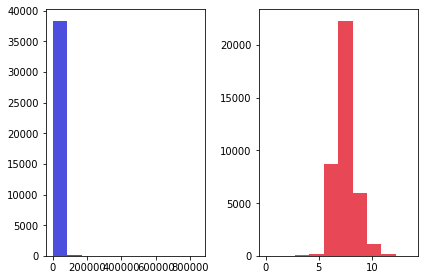

In [51]:
f, axs = plt.subplots(1, 2)

_=axs[0].hist(x=news["shares"], color = '#4C4EDD')
_=axs[1].hist(x=np.log(news["shares"]), color = '#E84855')


plt.tight_layout()

In [52]:
#news["shares"] = np.log(news["shares"])

##### Column 61 and 62 : Authors and Titles (scraped data)

We scraped these two column from Mashable.com outselves. Thus, there can be na's. Let's study them.

In [53]:
print(f'Nan in Authors: {news[news["Authors"] == "Nan"].url.count()}')
print(f'Nan in Titles: {news[news["Titles"] == "Nan"].url.count()}')

Nan in Authors: 619
Nan in Titles: 619


We have 619 rows with unknown authors and titles, we notice that they are the same columns so we drop them. 

In [54]:
news = news[news["Authors"] != "Nan"]

### 1.3 - Outlier Handling

In [ ]:
q1 = news['shares'].quantile(0.25)    # First Quartile
q3 = news['shares'].quantile(0.75)    # Third Quartile
IQR = q3 - q1                            # Inter Quartile Range

llimit = q1 - 1.5*IQR                       # Lower Limit
ulimit = q3 + 1.5*IQR                        # Upper Limit

indexs = news[(news['shares'] < llimit) | (news['shares'] > ulimit)].index
news.drop(index =indexs, inplace = True)

### 1.4 - Vectorization

First, we load the google's vectorization model.

In [55]:
load = True

In [56]:
if load:
    google_vecto_model = KeyedVectors.load_word2vec_format(vecto_path, binary=True)

##### Chanels' vectorization

In [57]:
news.reset_index(drop = True, inplace = True)

In [58]:
chanels = news.Chanel.unique()
chanels = [x if x != "Social Media" else "SocialMedia" for x in chanels]
vec_chanels = {(chanel):(google_vecto_model[chanel] if chanel != "Others" else [0 for i in range(300)]) for chanel in chanels}
vec_chanels["Social Media"] = vec_chanels.pop("SocialMedia")

all_vect_cols = []
vec_len = len(vec_chanels["Social Media"])
for i in range(vec_len):
    all_vect_cols.append([])

for row in news["Chanel"]:
    for i in range(vec_len):
        all_vect_cols[i].append(vec_chanels[row][i])
        
name_cols_chanels_vec = [f"WChanel {i}" for i in range(vec_len)]
df_chanel_vec = pd.DataFrame(np.transpose(all_vect_cols), columns=name_cols_chanels_vec)
news = pd.concat((news, df_chanel_vec), axis = 1)

### 1.5 - Creation of the working dataframes

In [59]:
export = False

##### Visualization dataframe

In [60]:
v_news = news.copy()

In [61]:
vecto_cols = [f"WChanel {i}" for i in range(300)]
_=v_news.drop(columns=vecto_cols, inplace = True)

_=v_news.drop(columns=['data_channel_is_lifestyle'], inplace = True)
_=v_news.drop(columns=['data_channel_is_entertainment'], inplace = True)
_=v_news.drop(columns=['data_channel_is_bus'], inplace = True)
_=v_news.drop(columns=['data_channel_is_socmed'], inplace = True)
_=v_news.drop(columns=['data_channel_is_tech'], inplace = True)
_=v_news.drop(columns=['data_channel_is_world'], inplace = True)

_=v_news.drop(columns=['weekday_is_monday'], inplace = True)
_=v_news.drop(columns=['weekday_is_tuesday'], inplace = True)
_=v_news.drop(columns=['weekday_is_wednesday'], inplace = True)
_=v_news.drop(columns=['weekday_is_thursday'], inplace = True)
_=v_news.drop(columns=['weekday_is_friday'], inplace = True)
_=v_news.drop(columns=['weekday_is_saturday'], inplace = True)
_=v_news.drop(columns=['weekday_is_sunday'], inplace = True)
_=v_news.drop(columns=['url'], inplace = True)
_=v_news.drop(columns=['timedelta'], inplace = True)

##### Machine and Deep Learning dataframe

In [62]:
m_news = news.copy()

In [63]:
_=m_news.drop(columns=['Chanel'], inplace = True)
_=m_news.drop(columns=['Weekday'], inplace = True)
_=m_news.drop(columns=['url'], inplace = True)
_=m_news.drop(columns=['date'], inplace = True)
_=m_news.drop(columns=['Authors'], inplace = True)
_=m_news.drop(columns=['Titles'], inplace = True)
_=m_news.drop(columns=['timedelta'], inplace = True)

We normalize the data for better accuracy of our machine and deep learning models.

In [64]:
x = m_news.iloc[:, m_news.columns != "shares"]
y = m_news["shares"]
cols = list(m_news.columns)
cols.remove("shares")
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
m_news = pd.DataFrame(x_scaled, columns=cols)
m_news["shares"] = y

We also want to suppress columns that are to much correlated to others (cf. Correlation heatmap in part.2)

In [65]:
threshold = 0.7

analysis_corr = m_news.corr()
upper_tri = analysis_corr.where(np.triu(np.ones(analysis_corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
to_drop = to_drop[:12] #we don't want to suppress vectorization of chanels it is perfectly normal for them to be correlated
to_drop = to_drop[:5] + to_drop[8:] #we keep latent dirichlet allocation topics
print(to_drop)

['n_non_stop_unique_tokens', 'kw_avg_min', 'kw_avg_avg', 'self_reference_avg_sharess', 'is_weekend', 'rate_positive_words', 'rate_negative_words', 'min_negative_polarity', 'abs_title_sentiment_polarity']


In [66]:
m_news.drop(columns=to_drop, inplace=True)

In [67]:
nb_dim = 5
vec_dim = 300

sub_vec = m_news.loc[:, "WChanel 0":"WChanel 299"]
pca = PCA(n_components=nb_dim)
pca.fit(sub_vec)
explanation_coefs = pca.explained_variance_ratio_
vec_pca_values = pca.transform(sub_vec)
print(f"Explained information: {round(np.sum(explanation_coefs), 2)}")

df_reduced_vec = pd.DataFrame(vec_pca_values)
dic_vec_labels = {i:f"WChanel {i}" for i in range(nb_dim)}
df_reduced_vec.rename(columns=dic_vec_labels, inplace=True)

vec_labels = [f"WChanel {i}" for i in range(vec_dim)]
m_news.drop(columns=vec_labels, inplace=True)
m_news = pd.concat((m_news, df_reduced_vec), axis = 1)
m_news.head(2)

Explained information: 0.95


n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0        0.476190          0.023770         0.619896          0.903614   
1        0.333333          0.028027         0.553400          0.915663   

   num_hrefs  num_self_hrefs  num_imgs  num_videos  average_token_length  \
0   0.013158        0.017241  0.007812         0.0              0.243242   
1   0.009868        0.008621  0.007812         0.0              0.295782   

   num_keywords  ...  title_subjectivity  title_sentiment_polarity  \
0      0.444444  ...                 0.5                   0.40625   
1      0.333333  ...                 0.0                   0.50000   

   abs_title_subjectivity   NbVisit  shares  WChanel 0  WChanel 1  WChanel 2  \
0                     0.0  0.373472     593    5.69764   0.155465  -2.549521   
1                     1.0  0.373472     711    1.05113  -0.610828   5.481747   

   WChanel 3  WChanel 4  
0  -1.042788  -0.141429  
1  -1.461703  -0.078145  

[2 rows x 56 columns]

In [68]:
if export:
    m_news.to_csv("m_news.csv")

## 2 - Data discovery 

### 2.1 - Univariate discovery

In [61]:
week_ref = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
Weekday_counts = v_news.groupby(by="Weekday").Weekday.count().reindex(week_ref)
index = list(Weekday_counts.index)
values = list(Weekday_counts.values)

source = ColumnDataSource(data=OrderedDict(weekday=index, counts=values))

p = figure(x_range=index, y_range=(0, np.max(values)+1000), height=350, title="Release Day Frequencies",
           toolbar_location=None, tools="hover", tooltips="@weekday: @counts")

p.vbar(x='weekday', top='counts', width=0.9, source=source, 
       line_color='white', fill_color=factor_cmap('weekday', palette=PRGn7, factors=index))

p.xgrid.grid_line_color = None

_=show(p, notebook_handle=True)

In [62]:
chanel = v_news.groupby(by="Chanel").Chanel.count()

fig = go.Figure(data=go.Scatterpolar(
  r=chanel.values,
  theta=chanel.index,
  fill='toself',
  name='Frequencies of Chanels'
))

fig.update_layout(
  title={
      'text': "Frequencies of Chanels", 
      'y': 0.9,
      'x': 0.5
  },
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False
)

fig.show()

In [63]:
autnb = v_news.groupby('Authors').count()['Titles'].sort_values(ascending = False)[:10]
autnb =autnb.reset_index()


fig = px.sunburst(autnb, path=['Authors'], values = 'Titles',title = "TOP 10 des acteurs ayant joué dans le plus de genres différents")
fig.show()

In [64]:
dates_by_months = v_news.groupby(v_news['date'].dt.strftime('%Y-%m')).date.count()
fig = go.Figure()
fig.add_trace(go.Scatter(x=dates_by_months.index, y=dates_by_months.values, name="spline",
    text=["tweak line smoothness<br>with 'smoothing' in line object"],
    hoverinfo='x+y',
    line_shape='spline'))

fig.update_layout(
  title={
      'text': "Frequencies of Releases", 
      'y': 0.9,
      'x': 0.5},
  showlegend=False,
)

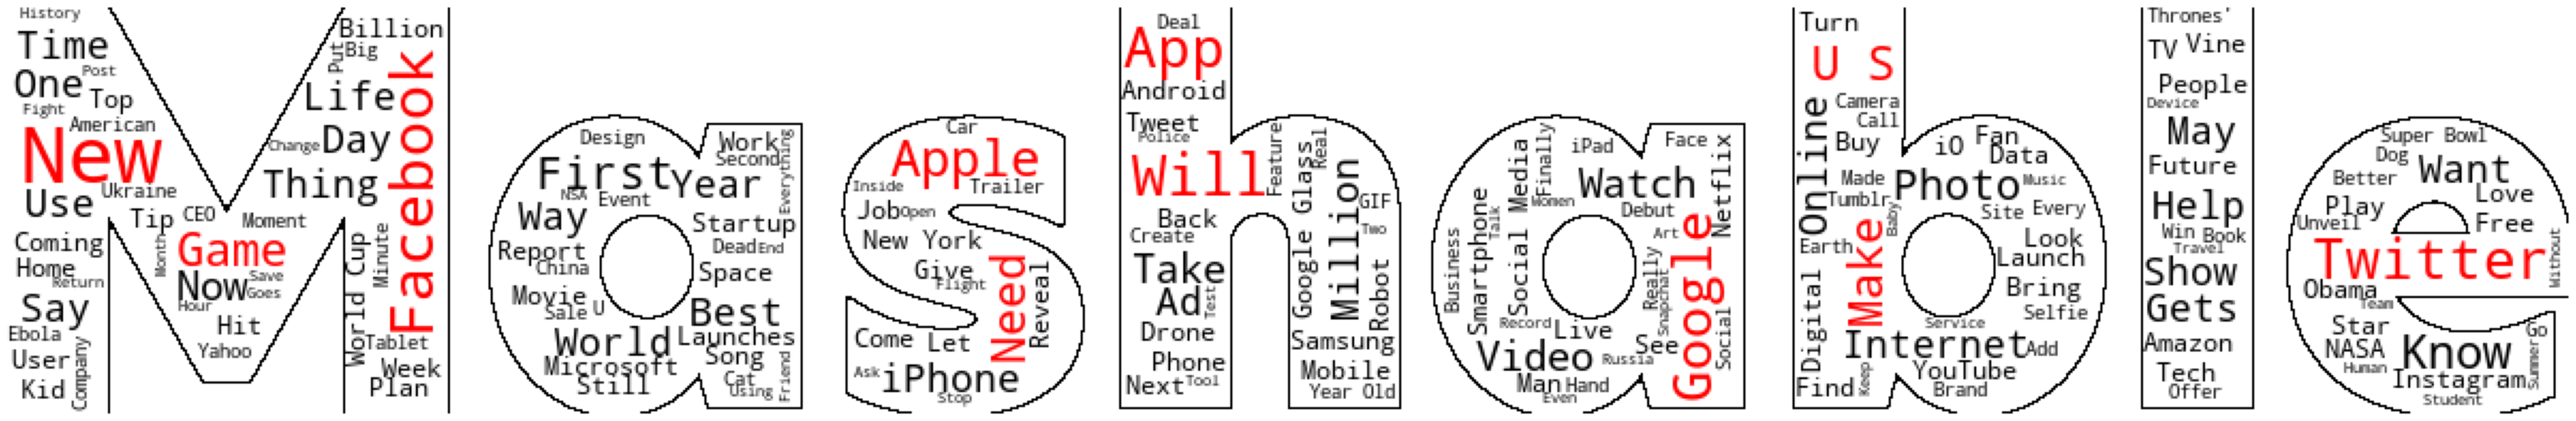

In [65]:
words = []
for x in v_news['Titles']:
    for y in x.split(' '):
        words.append(y)
text = ' '.join(words)
mask = np.array(Image.open(mlogo_path))
mask[mask == 0] = 255
wordcloud = WordCloud(background_color = 'white', max_words = 200, mask =mask,contour_width=1).generate(text)
i = 0
def couleur(*args, **kwargs):
    import random 
    global i 
    if i < 11:
        i = i+1
        return "rgb(255, 0, 0)" 
    if i > 10:
        return "rgb(0, 0, 0)"

plt.subplots(figsize=(60, 20))
plt.imshow(wordcloud.recolor(color_func = couleur))
plt.imshow(wordcloud)
plt.axis("off")
plt.show();

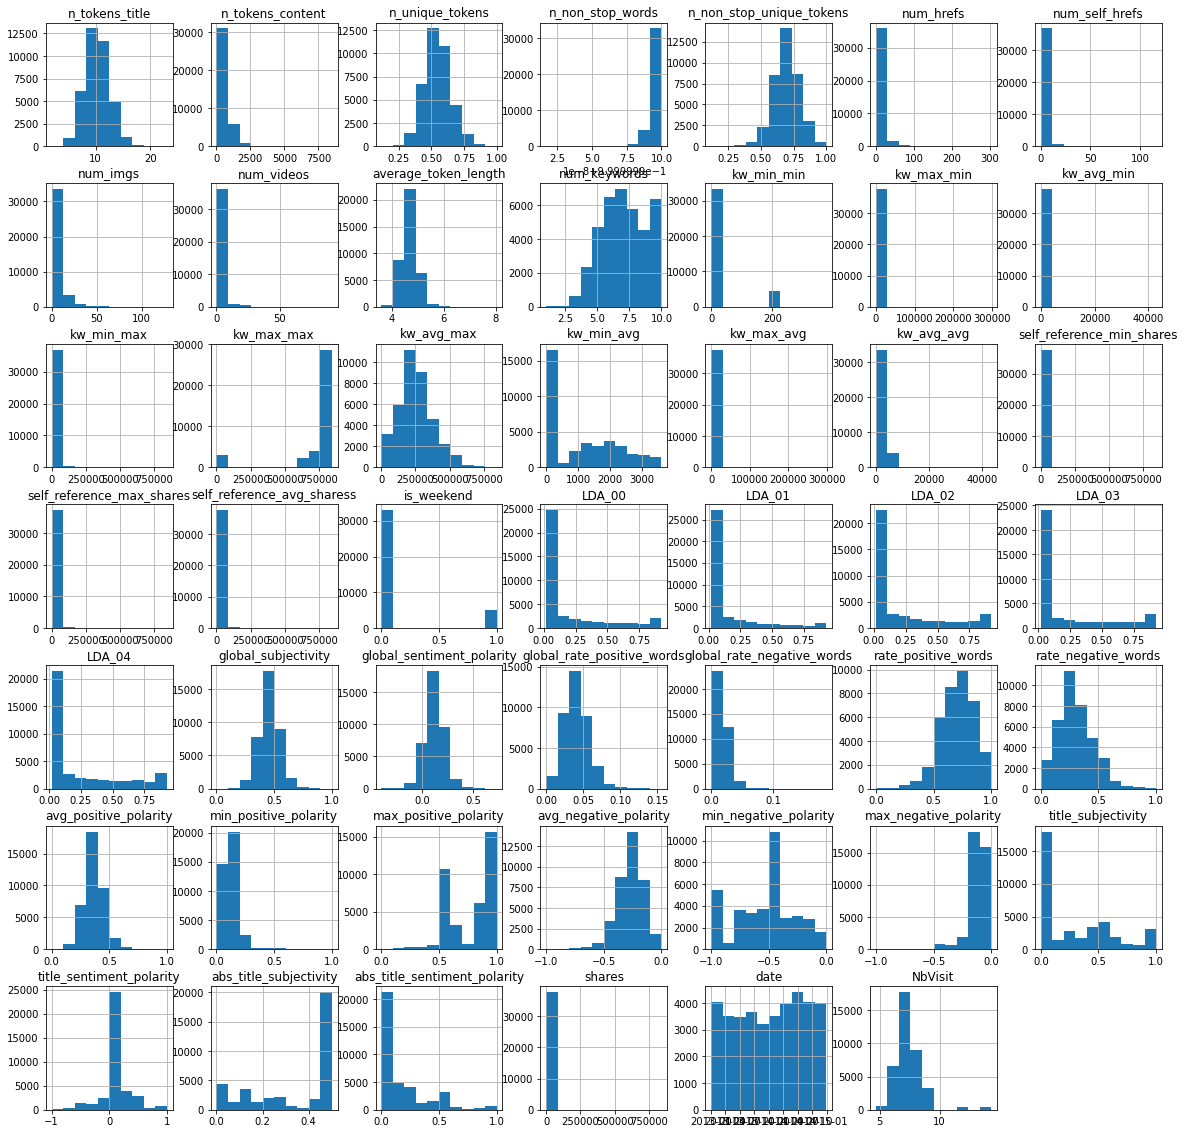

In [70]:
v_news.hist(figsize=(20,20))
plt.show()

### 2.2 - Data Analysis

##### Proximity of articles

In [71]:
lda = v_news.loc[:, "LDA_00":"LDA_04"]
pca = PCA(n_components=3)
pca.fit(lda)
explanation_coefs = pca.explained_variance_ratio_
pca_values = pca.transform(lda)
np.sum(explanation_coefs)

0.8375338639272224

With the columns we selected, 84% of the data is explained.

In [72]:
lda["Chanel"] = v_news["Chanel"]
map_colors = {
    "Entertainment":"limegreen",
    "Business": "darkturquoise",
    "Tech": "orchid",
    "LifeStyle": "royalblue",
    "World": "gold",
    "Others": "tomato",
    "Social Media": "pink"
}
colors = v_news["Chanel"].map(map_colors)

In [73]:
fig = px.scatter_3d(x=pca_values[:200, 0], y=pca_values[:200, 1], z=pca_values[:200, 2],
              color = lda["Chanel"].head(200), opacity=0.7)
        
# tight layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    legend_title="Chanels"
)

##### Evolution of TOP 10 most trendy authors over time

In [70]:
warnings.filterwarnings('ignore')


top_10_authors = v_news.groupby(by="Authors").shares.sum().sort_values(ascending=False).head(10).index.values
top_10_authors

top_10_authors_race = v_news[v_news["Authors"].isin(top_10_authors)].reset_index(drop=True)[["Authors", "shares", "date"]]
temp_date = pd.to_datetime(top_10_authors_race["date"]).dt.strftime('%m/%Y')
top_10_authors_race["date"] = pd.to_datetime(temp_date)

table_top_10_authors_race = pd.pivot_table(top_10_authors_race, 
                                           index="Authors", 
                                           columns="date", 
                                           values="shares", 
                                           aggfunc="sum").fillna(0).cumsum(axis=1)
table_top_10_authors_race = table_top_10_authors_race.T 


bcr.bar_chart_race(
    df=table_top_10_authors_race,
    #filename='covid19_horiz.mp4',
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=2,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_fmt='%Y',
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Nombre total de partages: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=150,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='TOP 10 most influencial authors of Mashable over time',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)

##### Correlation heatmap

In [71]:
corr = v_news.corr()
fig = px.imshow(corr,color_continuous_scale='RdBu_r', text_auto=True)
fig.show()

## 3 - Recipe for the perfect article 

##### Average polarity and subjectivity, how they interact and affect shares of a given article

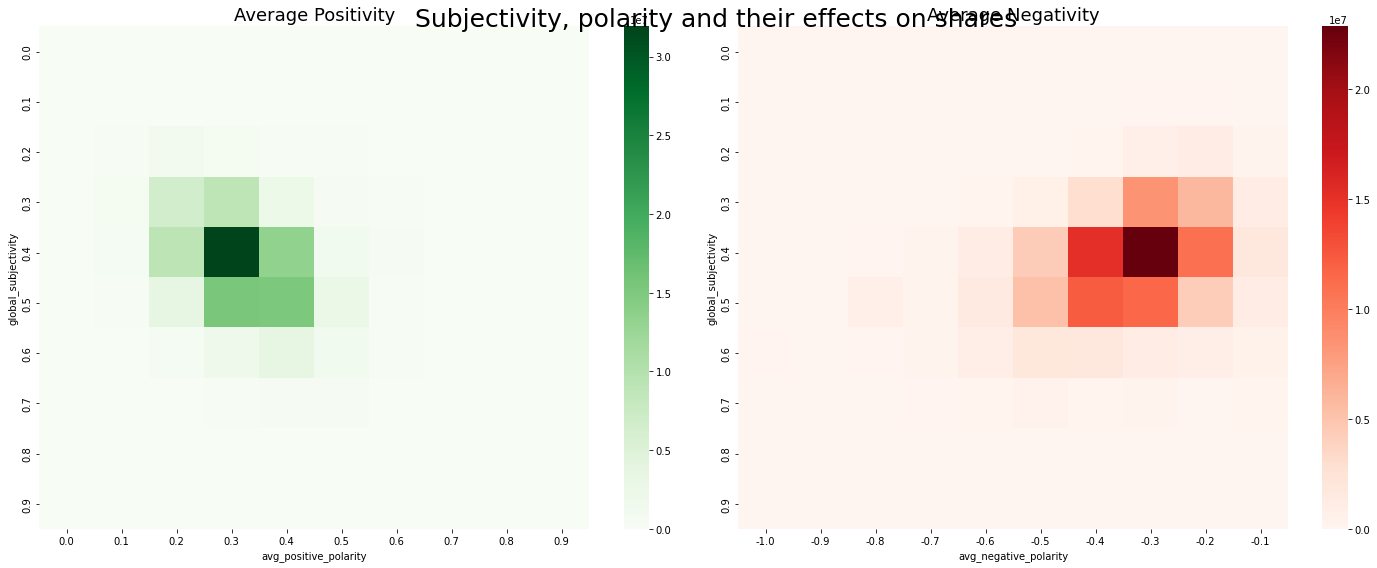

In [74]:
pol_subj_wr_shares = v_news[["global_subjectivity", "avg_positive_polarity", "avg_negative_polarity", "shares"]]

discrete_pol_subj_wr_shares = pd.DataFrame()
bins_v = [round(x, 1) for x in np.arange(0, 1.1, 0.1)]
labels_v = [round(i, 1) for i in np.arange(0, 1, 0.1)]
bins_v_neg = [round(x, 1) for x in np.arange(-1, 0.1, 0.1)]
labels_v_neg = [round(i, 1) for i in np.arange(-1, 0, 0.1)]

discrete_pol_subj_wr_shares["global_subjectivity"] = pd.cut(pol_subj_wr_shares["global_subjectivity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_positive_polarity"] = pd.cut(pol_subj_wr_shares["avg_positive_polarity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v_neg,
       labels = labels_v_neg)

discrete_pol_subj_wr_shares["shares"] = v_news["shares"]

discrete_pol_subj_wr_shares.reset_index(drop=True, inplace = True)

discrete_table_pol_positive_subj_wr_shares = pd.pivot_table(discrete_pol_subj_wr_shares,
                                                   index="global_subjectivity",
                                                   columns="avg_positive_polarity",
                                                   values="shares",
                                                   aggfunc="sum").fillna(0)

discrete_table_pol_negative_subj_wr_shares = pd.pivot_table(discrete_pol_subj_wr_shares,
                                                   index="global_subjectivity",
                                                   columns="avg_negative_polarity",
                                                   values="shares",
                                                   aggfunc="sum").fillna(0)

f, axs = plt.subplots(1, 2, figsize = (20, 8))

sns.heatmap(discrete_table_pol_positive_subj_wr_shares, ax = axs[0], cmap="Greens")
sns.heatmap(discrete_table_pol_negative_subj_wr_shares, ax = axs[1], cmap="Reds")

axs[0].set_title("Average Positivity", size = 18)
axs[1].set_title("Average Negativity", size=18)
plt.suptitle("Subjectivity, polarity and their effects on shares", size = 25)

plt.tight_layout()

In [73]:
px.histogram(v_news, x="global_sentiment_polarity", y="shares", color="Chanel", color_discrete_sequence=Magma7)

From these graphs, we conclude that articles with more positive polarity tend to be more appreciated. (biased interpretation)

##### Number of shares per author and type of article

In [74]:
n_shares_wr_author_chanel = pd.pivot_table(v_news, 
                                           index="Authors", 
                                           columns="Chanel", 
                                           values="shares", 
                                           aggfunc="sum").fillna(0)
n_shares_wr_author_chanel["cumsum"] = np.sum(n_shares_wr_author_chanel, axis=1)
n_shares_wr_author_chanel.sort_values(by="cumsum", ascending=False, inplace=True)
n_shares_wr_author_chanel.drop(labels="cumsum", axis=1, inplace=True)
top10_n_shares_wr_author_chanel = n_shares_wr_author_chanel.head(10)

fig = px.bar(top10_n_shares_wr_author_chanel, height=400,
             color_discrete_sequence=Magma7, 
             title="Number of shares per author and types of articles written")
fig.show()

##### Shares with respect to day of release

Source for the graph : https://www.python-graph-gallery.com/web-circular-barplot-with-matplotlib

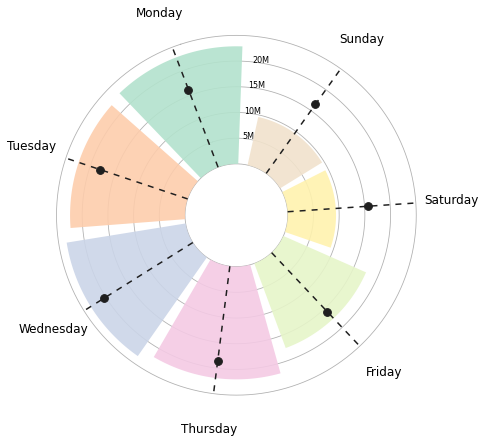

In [75]:
week_ref = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dor = v_news[["Weekday", "shares"]].groupby(by="Weekday").sum().reindex(week_ref)
means_5000 = (v_news[["Weekday", "shares"]].groupby(by="Weekday").mean().values * 5000)

angles = np.linspace(0.05, 2 * np.pi - 0.05, dor.shape[0], endpoint=False)

GREY12 = "#1f1f1f"
plt.rcParams.update({"font.family": "Bell MT"})

plt.rc("axes", unicode_minus=False)
f, ax = plt.subplots(figsize=(7, 10), subplot_kw={"projection": "polar"})
f.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-10000000, 28000000)

ax.bar(angles,
       dor["shares"],
       width=0.80,
       color = Pastel2_7,
       alpha = 0.9,
       zorder=10)

ax.vlines(angles, 
          0, 
          25000000, 
          color=GREY12, 
          ls=(0, (4, 4)), 
          zorder=11)

ax.scatter(angles, 
           means_5000, 
           s=60, 
           color=GREY12, 
           zorder=11)

ax.xaxis.grid(False)


ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

ax.set_xticks(angles)
ax.set_yticklabels([])
ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000, 25000000])

XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(10)

PAD = 10
ax.text(-0.3*np.pi / 2, 5000000 + PAD, "5M", ha="center", size=8)
ax.text(-0.3*np.pi / 2, 10000000 + PAD, "10M", ha="center", size=8)
ax.text(-0.3*np.pi / 2, 15000000 + PAD, "15M", ha="center", size=8)
ax.text(-0.3*np.pi / 2, 20000000 + PAD, "20M", ha="center", size=8)

ax.set_xticklabels(week_ref, size=12);

##### How additionnal medias (links, images and videos) affect shares

In [76]:
img_vid_wr_shares = v_news[["num_hrefs", "num_imgs", "num_videos", "shares"]]
table1_img_vid_wr_shares = pd.pivot_table(img_vid_wr_shares,
                                          index="num_hrefs", 
                                          columns="num_imgs", 
                                          values="shares", 
                                          aggfunc="sum").fillna(0)

In [77]:
fig1 = px.density_heatmap(img_vid_wr_shares, 
                   x="num_hrefs", 
                   y="num_imgs", 
                   z="shares", 
                   marginal_x="histogram", 
                   marginal_y="histogram",
                   histfunc="sum",
                   color_continuous_scale=Purples9)

fig2 = px.density_heatmap(img_vid_wr_shares, 
                   x="num_hrefs", 
                   y="num_videos", 
                   z="shares", 
                   marginal_x="histogram", 
                   marginal_y="histogram",
                   histfunc="sum",
                   color_continuous_scale=Greens9)

fig3 = px.density_heatmap(img_vid_wr_shares, 
                   x="num_imgs", 
                   y="num_videos", 
                   z="shares", 
                   marginal_x="histogram", 
                   marginal_y="histogram",
                   histfunc="sum",
                   color_continuous_scale=YlOrRd9)

fig1.update_layout(xaxis_range=[0,30])
fig1.update_layout(yaxis_range=[0,10])

fig2.update_layout(xaxis_range=[0,30])
fig2.update_layout(yaxis_range=[0,10])

fig3.update_layout(xaxis_range=[0,30])
fig3.update_layout(yaxis_range=[0,10])

fig1.show()
fig2.show()
fig3.show()

##### Number of shares with respect of topic

In [78]:
df = pd.DataFrame()
df['chanel'] = v_news["Chanel"]
df['shares'] = v_news['shares']
df2 = df.groupby('chanel').count().reset_index()
df =  df.groupby('chanel').sum().reset_index()
df['count'] = df2['shares']
df['shares_nb'] = df['shares']/df['count']
df = df.drop(labels=3, axis=0)

fig = px.bar(df, x='chanel', y='shares_nb', color = 'chanel') 
fig.show()

##### Length of Titles with respect to shares

In [79]:
df = pd.DataFrame()
df['shares'] = v_news['shares'] 
df['lentitle'] = v_news['n_tokens_title']
df2 = df.groupby('lentitle').count().reset_index()
df =  df.groupby('lentitle').sum().reset_index()
df['count'] = df2['shares']
df['shares_nb'] = df['shares']/df['count']

fig = px.bar(df, x='lentitle', y='shares_nb')
fig.show()

In [80]:
fig = px.scatter(v_news, x='n_tokens_title', y='shares', color = 'Chanel')
fig.show()

##### Length of bodies with respect to shares

In [81]:
df = pd.DataFrame()
df['shares'] = v_news['shares'] 
df['lencorpus'] = v_news['n_tokens_content']
df2 = df.groupby('lencorpus').count().reset_index()
df =  df.groupby('lencorpus').sum().reset_index()
df['count'] = df2['shares']
df['shares_nb'] = df['shares']/df['count']

fig = px.scatter(df, x='lencorpus', y='shares_nb',trendline='ols')
fig.show()

In [82]:
fig = px.scatter(v_news, x='n_tokens_content', y='shares',color = 'Chanel',trendline='ols')
fig.show()

##### Length of words 

In [83]:
df = pd.DataFrame()
df['shares'] = v_news['shares']
df['lenwords'] = v_news['average_token_length']
df2 = df.groupby('lenwords').count().reset_index()
df =  df.groupby('lenwords').sum().reset_index()
df['count'] = df2['shares']
df['shares_nb'] = df['shares']/df['count']

fig = px.scatter(df, x='lenwords', y='shares_nb',trendline='ols')
fig.show()

In [84]:
fig = px.scatter(v_news, x='average_token_length', y='shares',color = 'Chanel',trendline='ols')
fig.show()

## 4 - Prediction

### 4.1 - Regression

First, we create separate explainatory variables from target variables.

In [81]:
search = False
lm_data = m_news.copy()
del lm_data['Class_shares2']
del lm_data['Class_shares1']
x = lm_data.loc[:, lm_data.columns != "shares"]
y = lm_data.loc[:, lm_data.columns == "shares"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
object = StandardScaler()
x_train_scale = object.fit_transform(x_train)
x_test_scale = object.fit_transform(x_test)

##### AUTOML

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=3600,
    per_run_time_limit=600,
    memory_limit = 35000
)

if search:
  automl.fit(x_train_scale, y_train)
if search:
  automl.leaderboard()
if search:
  automl.score(x_test_scale, y_test)
if search:
  automl.show_models()

##### ARDRegression

In [82]:
model = ARDRegression(alpha_1=2.7664515192592053e-05, alpha_2=9.504988116581138e-07,
                copy_X=False, lambda_1=4.184987756432487e-09,
                lambda_2=4.238533890074848e-07,
                threshold_lambda=78251.58542976103, tol=0.0006951835906397672)
model.fit(x_train_scale,y_train)
model.score(x_test_scale,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.007794552923891196

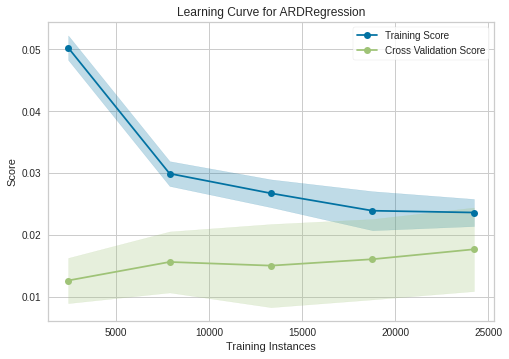

In [87]:
cross_validate(model, x_train_scale, np.ravel(y_train), cv = 5)
cv = StratifiedKFold(n_splits=5)
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(x_train_scale, np.ravel(y_train))        # Fit the data to the visualizer
visualizer.show() 

### 4.2 - Binarie Classification (High/Low)

In [ ]:
class_data = m_news.copy()
del class_data['shares']
del class_data['Class_shares2']

x = class_data.loc[:, class_data.columns != "Class_shares1"]
y = class_data.loc[:, class_data.columns == "Class_shares1"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
y_train = np.where(y_train == 'high',1,0)
y_test = np.where(y_test == 'high',1,0)

object = StandardScaler()
x_train_scale = object.fit_transform(x_train)
x_test_scale = object.fit_transform(x_test)

##### AUTOML

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=30000,per_run_time_limit=3600, memory_limit = 25000)
automl.fit(x_train_scale, y_train)

automl.leaderboard()

In [ ]:
automl.score(x_test_scale, y_test)

##### Gradiant boosting

In [ ]:
model = HistGradientBoostingClassifier()
model.fit(x_train_scale,y_train)

pred = model.predict(x_test_scale)
model.score(x_test_scale,y_test)

model.fit(x_train_scale,y_train)
model.score(x_test_scale,y_test )

parameters_hgb = [{'max_iter': [1000,1200,1500],
                'learning_rate': [0.1],
                'max_depth' : [25, 50, 75],
                'l2_regularization': [1.5],
                'scoring': ['f1_micro']}]

grid_search_hgb = GridSearchCV(estimator = HistGradientBoostingClassifier(),
                           param_grid = parameters_hgb,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search_hgb.fit(x_train_scale, y_train)
grid_search_hgb.best_score_
grid_search_hgb.best_params_

In [ ]:
model = HistGradientBoostingClassifier(early_stopping=True,
                                       l2_regularization=1.5,
                                       learning_rate=0.1, max_iter=1000,
                                       max_leaf_nodes=4, min_samples_leaf=2,
                                       n_iter_no_change=14, random_state=1,
                                       validation_fraction=None, warm_start=True)
model.fit(x_train_scale, y_train)
y_pred = model.predict(x_test_scale)
conf = confusion_matrix(y_test, y_pred)

In [ ]:
fig = px.imshow(conf,color_continuous_scale='RdBu_r')
fig.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, x_train_scale, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

##### AdaBoost

In [ ]:
model = AdaBoostClassifier()
model.score(x_test_scale, y_test)
model = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.03734246906377268, n_estimators=416,
                   random_state=1)
model.fit(x_train_scale, y_train)
model.score(x_test_scale, y_test)
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [200, 416],
              "algorithm" : ['SAMME']
             }
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = 4)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC.fit(x_train_scale, y_train)
grid_search_ABC.best_params_

In [ ]:
grid_search_ABC.score(x_test_scale, y_test)

In [ ]:
y_pred = grid_search_ABC.predict(x_test_scale)
fig = px.imshow(conf,color_continuous_scale='RdBu_r')
fig.show()

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(model, x_train_scale, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 5))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [ ]:
y_pred_class = model.predict(x_test_scale)
print(metrics.classification_report(y_test, y_pred_class))

##### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train_scale, y_train)
model.score(x_test_scale, y_test)

par = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2],
 'n_estimators': [200, 400, 600]}

grid_search_RF = GridSearchCV(RandomForestClassifier(), param_grid=par, scoring = 'roc_auc')

##### KNN

In [ ]:
k_range = np.arange(80,100)
accuracy = []

for n in k_range:    
    neigh = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)

    neigh.fit(x_train_scale, y_train)  

    # predict the result
    y_pred = neigh.predict(x_test_scale)
    accuracy.append(100*accuracy_score(y_pred, y_test))

plt.figure(figsize=(20,13))
plt.plot(k_range, accuracy, 'r-', label='KNN Accuracy Vs KNN Neighbors size')
plt.plot(k_range, accuracy, 'bx')
plt.xlabel('KNN Neighbors size')
plt.ylabel('KNN Accuracy')
plt.legend()
plt.grid()
plt.title('KNN Accuracy Vs Neighbors size')
plt.show()

### 4.3 - Quantile Classification (Very low, low, high, very high)

In [ ]:
class_data = m_news.copy()

del class_data['shares']
del class_data['Class_shares1']

le = preprocessing.LabelEncoder()
le.fit(class_data['Class_shares2'])
class_data['Class_shares2'] = le.transform(class_data['Class_shares2'])

x = class_data.loc[:, class_data.columns != "Class_shares2"]
y = class_data.loc[:, class_data.columns == "Class_shares2"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

object = StandardScaler()
x_train_scale = object.fit_transform(x_train)
x_test_scale = object.fit_transform(x_test)



##### AUTOML

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(time_left_for_this_task=600,per_run_time_limit=30, memory_limit = 25000)
automl.fit(x_train_scale, y_train)
automl.leaderboard()

In [ ]:
automl.score(x_test_scale, y_test)

Auto Ml result:



*   {3: {'model_id': 3, 'rank': 1, 'cost': 0.6056450805725153, 'ensemble_weight': 0.08, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f87e1721dd0>, 'balancing': Balancing(random_state=1, strategy='weighting'), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f87e16df390>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f87e16df790>, 'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=True, l2_regularization=2.506856350040198e-06, learning_rate=0.04634380160611007, max_iter=512, max_leaf_nodes=11, min_samples_leaf=41, n_iter_no_change=17, random_state=1, validation_fraction=None, warm_start=True)}, 

* 31: {'model_id': 31, 'rank': 2, 'cost': 0.6329696727054349, 'ensemble_weight': 0.02, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f87e134ead0>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f87e16844d0>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f87e1bc0b10>, 'sklearn_classifier': RandomForestClassifier(criterion='entropy', max_features=11, min_samples_leaf=17, min_samples_split=5, n_estimators=512, n_jobs=1, random_state=1, warm_start=True)},

* 36: {'model_id': 36, 'rank': 3, 'cost': 0.6337703933540186, 'ensemble_weight': 0.08, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f87e1713a90>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f87e15560d0>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f87e16da710>, 'sklearn_classifier': SGDClassifier(alpha=0.030141332647102347, average=True, eta0=0.01, l1_ratio=2.7584347540451703e-08, max_iter=16, penalty='elasticnet', random_state=1, tol=0.0008815919929155539, warm_start=True)}

##### Hist Gradient Boosting

In [ ]:
model = HistGradientBoostingClassifier(early_stopping=True,
                                 l2_regularization=2.506856350040198e-06,
                                 learning_rate=0.04634380160611007, max_iter=512,
                                 max_leaf_nodes=11, min_samples_leaf=41,
                                 n_iter_no_change=17, random_state=1,
                                 validation_fraction=None, warm_start=True)

model.fit(x_train_scale,y_train)
model.score(x_test_scale,y_test)
y_pred = model.predict(x_test_scale)
conf = confusion_matrix(y_test, y_pred)
fig = px.imshow(conf,color_continuous_scale='RdBu_r')
fig.show()

##### Random Forest

In [ ]:
model = RandomForestClassifier(criterion='entropy', max_features=11,
                         min_samples_leaf=17, min_samples_split=5,
                         n_estimators=512, n_jobs=1, random_state=1,
                         warm_start=True)

model.fit(x_train_scale,y_train)
model.score(x_test_scale,y_test)
y_pred = model.predict(x_test_scale)
conf = confusion_matrix(y_test, y_pred)
fig = px.imshow(conf,color_continuous_scale='RdBu_r')
fig.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred))

### 4.4 Clustering

##### PCA and TSNE Transformation

In [ ]:
class_data = m_news.copy()

del class_data['shares']
del class_data['Class_shares1']

x = class_data.loc[:, class_data.columns != "Class_shares2"]
y = class_data.loc[:, class_data.columns == "Class_shares2"]

object = StandardScaler()
x_scale = object.fit_transform(x)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x_train_scale)
reduced_data.shape

plt.figure(figsize=(10,10))
plt.plot(reduced_data[:,0], reduced_data[:,1], 'r.')
plt.title('PCA Transformation')

plt.show()

In [ ]:
tsne = TSNE(n_components=2, n_iter=300)
reduced_tsne = tsne.fit_transform(x_train_scale)

# plotting the clusters TSNE
plt.figure(figsize=(10,10))
plt.plot(reduced_tsne[:,0], reduced_tsne[:,1], 'r.')
plt.title('TSNE Transformation')
plt.show()

##### KMeans

In [ ]:
k=list(range(1,9))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(reduced_tsne)
    ssd.append(kmeans.inertia_)
    
plt.plot(k,ssd,'o-')
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.show()

kmeans=KMeans(init='k-means++',n_clusters=5)
kmeans.fit(reduced_tsne)
kmeans_preds=kmeans.predict(reduced_tsne)

col = []
for x in kmeans_preds:
  if x == 0:
    col.append('black')
  if x == 1:
    col.append('blue')
  if x == 2:
    col.append('red')
  if x == 3:
    col.append('orange')
  if x == 4:
    col.append('green')

centroids = kmeans.cluster_centers_
clusters = np.unique(kmeans_preds)

# ploting the result of of the clusters
ax, fig = plt.subplots(figsize=(15,7))

plt.scatter(reduced_tsne[:,0],reduced_tsne[:,1],c=col,marker='.',)
plt.show()

### 4.5 - Deep learning Prediction

In [99]:
x = m_news.loc[:, m_news.columns != "shares"]
y = np.ravel(m_news.loc[:, m_news.columns == "shares"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) #data is already scaled

In [171]:
scaler_target = preprocessing.RobustScaler()
y_train_scaled = scaler_target.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.reshape(-1, 1))

In [172]:
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=(55,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse',
              metrics=['mae', 'mse'],
              optimizer = optimizers.RMSprop(0.0001))

In [158]:
model2 = Sequential()
model2.add(Dense(5, activation='relu', input_shape=(55,)))
model2.add(Dense(25, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(25, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(loss='mse',
              metrics=['mae', 'mse'],
              optimizer = optimizers.RMSprop(0.0001))

In [159]:
history = model2.fit(x_train, y_train_scaled, validation_data=(x_test, y_test_scaled), epochs=15, batch_size=200)

Epoch 1/15
127/127 [==============================] - 1s 5ms/step - loss: 0.0349 - mae: 0.1277 - mse: 0.0349 - val_loss: 0.0026 - val_mae: 0.0356 - val_mse: 0.0026
Epoch 2/15
127/127 [==============================] - 0s 3ms/step - loss: 0.0146 - mae: 0.0810 - mse: 0.0146 - val_loss: 0.0013 - val_mae: 0.0237 - val_mse: 0.0013
Epoch 3/15
127/127 [==============================] - 0s 4ms/step - loss: 0.0060 - mae: 0.0502 - mse: 0.0060 - val_loss: 5.7661e-04 - val_mae: 0.0148 - val_mse: 5.7661e-04
Epoch 4/15
127/127 [==============================] - 0s 4ms/step - loss: 0.0024 - mae: 0.0289 - mse: 0.0024 - val_loss: 3.5080e-04 - val_mae: 0.0079 - val_mse: 3.5080e-04
Epoch 5/15
127/127 [==============================] - 0s 4ms/step - loss: 9.9641e-04 - mae: 0.0158 - mse: 9.9641e-04 - val_loss: 2.6404e-04 - val_mae: 0.0057 - val_mse: 2.6404e-04
Epoch 6/15
127/127 [==============================] - 0s 4ms/step - loss: 4.8271e-04 - mae: 0.0099 - mse: 4.8271e-04 - val_loss: 2.3623e-04 - val_ma

In [173]:
history = model.fit(x_train, y_train_scaled, validation_data=(x_test, y_test_scaled), epochs=20, batch_size=200)

Epoch 1/20
127/127 [==============================] - 1s 5ms/step - loss: 41.0968 - mae: 1.5816 - mse: 41.0968 - val_loss: 52.9539 - val_mae: 1.5460 - val_mse: 52.9539
Epoch 2/20
127/127 [==============================] - 0s 3ms/step - loss: 40.2158 - mae: 1.5907 - mse: 40.2158 - val_loss: 52.3863 - val_mae: 1.6523 - val_mse: 52.3863
Epoch 3/20
127/127 [==============================] - 0s 4ms/step - loss: 39.9413 - mae: 1.6565 - mse: 39.9413 - val_loss: 52.2082 - val_mae: 1.6961 - val_mse: 52.2082
Epoch 4/20
127/127 [==============================] - 0s 4ms/step - loss: 39.9322 - mae: 1.6726 - mse: 39.9322 - val_loss: 52.1386 - val_mae: 1.7044 - val_mse: 52.1386
Epoch 5/20
127/127 [==============================] - 1s 4ms/step - loss: 39.8302 - mae: 1.6787 - mse: 39.8302 - val_loss: 52.0991 - val_mae: 1.7023 - val_mse: 52.0991
Epoch 6/20
127/127 [==============================] - 1s 4ms/step - loss: 39.8074 - mae: 1.6736 - mse: 39.8074 - val_loss: 52.0689 - val_mae: 1.7046 - val_mse: 

In [178]:
y_pred = model.predict(x_test)
score = model.evaluate(x_test, y_test, verbose=1)
print(score)

391/391 [==============================] - 1s 2ms/step - loss: 173525888.0000 - mae: 3447.8882 - mse: 173525888.0000
[173525888.0, 3447.88818359375, 173525888.0]


In [123]:
train_mse = model.evaluate(x_train, y_train, verbose=0)
test_mse = model.evaluate(x_test, y_test, verbose=0)
print(f"MSE Train : {train_mse} || MSE Test : {test_mse}")

MSE Train : [121189120.0, 2959.9599609375, 121189120.0] || MSE Test : [159988352.0, 3075.32763671875, 159988352.0]


Text(0, 0.5, 'value loss')

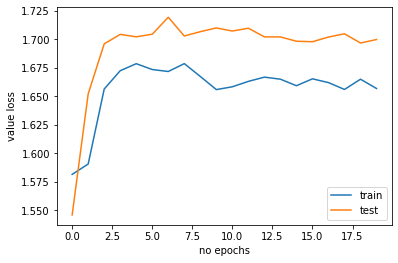

In [177]:
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='test')
_=plt.legend()
plt.xlabel("no epochs")
plt.ylabel("value loss")

In [162]:
y_pred = model2.predict(x_test)
y_pred

391/391 [==============================] - 2s 4ms/step


array([[0.00376267],
       [0.00395717],
       [0.00395717],
       ...,
       [0.00395717],
       [0.00346619],
       [0.00364666]], dtype=float32)

In [179]:
scaler_target.inverse_transform(y_pred)

array([[2626.3882],
       [2351.3154],
       [2672.558 ],
       ...,
       [2655.6348],
       [2578.761 ],
       [2761.5205]], dtype=float32)

## Flask API hosted on AWS

In [ ]:
filename = 'model_api.sav'
pickle.dump(grid_search_ABC, open(filename, 'wb'))

In [ ]:
filename = 'model_api.sav'
loaded_model = pickle.load(open(filename, 'rb'))

def prediction(l):
    result = loaded_model.predict(l)
    return result 

def stringtodf(s):
    l = s.split('/')
    l = [float(z) for z in l]
    temp = pd.read_csv('news_api.csv')
    del temp['Class_shares1']
    del temp['Unnamed: 0']
    data = dict(zip(temp.columns,l))
    df = pd.DataFrame(columns = temp.columns)
    df.loc[0] = pd.Series(data)
    object = StandardScaler()
    object.fit(temp)
    df.loc[0] = object.transform(df)
    return df

app1 = Flask(__name__) 
@app1.route('/status', methods=['GET'])
def a_live():
    return "Alive!"

@app1.route('/predict', methods=['GET'])
def predict():
    args = request.args
    info = args['info']
    line = stringtodf(info)
    val = prediction(line)
    if val[0] == 1 :
        return 'high'
    if val[0] == 0 :
        return 'low'
    
#app1.run(debug=True ,host='0.0.0.0', port=8080)

In [ ]:
news_api = pd.read_csv('/content/drive/MyDrive/pyhton/news_api.csv')

news_api.drop(columns=['Unnamed: 0'], inplace = True)
news_api.head(5)

In [ ]:
threshold = 0.7

analysis_corr = news_api.corr()
upper_tri = analysis_corr.where(np.triu(np.ones(analysis_corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
to_drop = to_drop[:12] #we don't want to suppress vectorization of chanels it is perfectly normal for them to be correlated
to_drop = to_drop[:5] + to_drop[8:] #we keep latent dirichlet allocation topics
print(to_drop)

news_api.drop(columns=to_drop, inplace=True)
news_api['Class_shares1'] = Class_shares1
news_api['Class_shares2'] = Class_shares2

del news_api['Class_shares2']

news_api.to_csv('news_api.csv')

x = news_api.loc[:, news_api.columns != "Class_shares1"]
y = news_api.loc[:, news_api.columns == "Class_shares1"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

y_train = np.where(y_train == 'high',1,0)
y_test = np.where(y_test == 'high',1,0)

object = StandardScaler()
x_train_scale = object.fit_transform(x_train)
x_test_scale = object.fit_transform(x_test)

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [200, 416],
              "algorithm" : ['SAMME']
             }
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = 4)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC.fit(x_train_scale, y_train)
grid_search_ABC.score(x_test_scale, y_test)

## WebApp

### 1 - Model for the webapp

In [ ]:
news_api = pd.read_csv('/content/drive/MyDrive/pyhton/news_api.csv')

news_api.drop(columns=['Unnamed: 0'], inplace = True)
news_api.head(5)

In [ ]:
threshold = 0.7

analysis_corr = news_api.corr()
upper_tri = analysis_corr.where(np.triu(np.ones(analysis_corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
to_drop = to_drop[:12] #we don't want to suppress vectorization of chanels it is perfectly normal for them to be correlated
to_drop = to_drop[:5] + to_drop[8:] #we keep latent dirichlet allocation topics
print(to_drop)

news_api.drop(columns=to_drop, inplace=True)
news_api['Class_shares1'] = Class_shares1
news_api['Class_shares2'] = Class_shares2

del news_api['Class_shares2']

news_api.to_csv('news_api.csv')

x = news_api.loc[:, news_api.columns != "Class_shares1"]
y = news_api.loc[:, news_api.columns == "Class_shares1"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

y_train = np.where(y_train == 'high',1,0)
y_test = np.where(y_test == 'high',1,0)

object = StandardScaler()
x_train_scale = object.fit_transform(x_train)
x_test_scale = object.fit_transform(x_test)

param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [200, 416],
              "algorithm" : ['SAMME']
             }
DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = 4)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
grid_search_ABC.fit(x_train_scale, y_train)
grid_search_ABC.score(x_test_scale, y_test)

### 2 - Webapp runcode

Source related to webapp : https://samuelpariente-online-news-popularity-webappwebapp-oijqkv.streamlit.app/

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 22 09:42:42 2022

@author: samue
"""

import streamlit as st
import requests

st.title('Live Prediction')


p1 = st.slider('n_tokens_title', 0, 30 ,10, step = 1)

p2 = st.slider('n_tokens_content', 0, 10000,564, step = 1)

p3 = st.slider('n_unique_tokens', 0.00, 1.00,0.54, step = 0.01)

p4 = st.slider('n_non_stop_words', 0.00, 1.00,1.00, step = 0.01)

p5 = st.slider('num_hrefs', 0, 350,11, step = 1)

p6 = st.slider('num_self_hrefs', 0, 150,3, step = 1)

p7 = st.slider('num_imgs', 0, 100,5, step = 1)

p8 = st.slider('num_videos', 0, 150,1, step = 1)

p9 = st.slider('average_token_length', 0.00, 10.00,4.6, step = 0.01)

p10 = st.slider('num_keywords', 0.00, 10.00,7.2, step = 0.01)

p11 = st.selectbox(
    'How would you like to be contacted?',
    ('lifestyle', 'entertainment', 'bus','socmed','tech','world'))
st.write('You selected:', p11)


p12 = st.slider('kw_min_min', 0, 300000,1150, step = 1)

p122 = st.slider('kw_max_min', 0, 300000,1152, step = 1)

p13 = st.slider('kw_min_max', 0, 843300,13062, step = 1)

p14 = st.slider('kw_max_max', 0, 843300,750683, step = 1)


p15 = st.slider('kw_avg_max', 0,843300,255064, step = 1)


p16 = st.slider('kw_min_avg', 0, 3613, 1094,step = 1)

p17 =st.slider('kw_max_avg', 0, 298400,5582, step = 1)


p18 = st.slider('self_reference_min_shares', 0, 850000,4131, step = 1)


p19 = st.slider('self_reference_max_shares', 0, 850000,10585, step = 1)


p20 = st.selectbox(
    'How would you like to be contacted?',
    ('monday', 'tuesday', 'wednesday','thursday','friday','saturday','sunday'))

st.write('You selected:', p20)

p21 = st.slider('LDA_00', 0.00, 1.00,0.18, step = 0.01)


p22 = st.slider('LDA_01', 0.00, 1.00,0.14, step = 0.01)

p23 = st.slider('LDA_02', 0.00, 1.00,0.21, step = 0.01)

p24 = st.slider('LDA_03', 0.00, 1.00,0.21, step = 0.01)

p25 = st.slider('LDA_04', 0.00, 1.00,0.23, step = 0.01)

p26 = st.slider('global_subjectivity', 0.00, 1.00,0.45, step = 0.01)

p27 = st.slider('global_sentiment_polarity',0.00, 1.00,0.12, step = 0.01)

p28 = st.slider('global_rate_positive_words', 0.00, 0.20,0.04, step = 0.01)

p29 =  st.slider('global_rate_negative_words,', 0.00, 0.20,0.01, step = 0.01)

p30 = st.slider('avg_positive_polarity', 0.00, 1.00,0.36, step = 0.01)

p31 =st.slider('min_positive_polarity', 0.00, 1.00,0.09, step = 0.01)

p32 = st.slider('max_positive_polarity', 0.00, 1.00,0.77, step = 0.01)

p33 = st.slider('avg_negative_polarity', -1.00, 0.00,-0.26, step = 0.01)

p34 = st.slider('max_negative_polarity', -1.00, 0.00,-0.11, step = 0.01)

p35 = st.slider('title_subjectivity', 0.00, 1.00,0.28, step = 0.01)

p36 =st.slider('title_sentiment_polarity', 0.00, 1.00,0.06, step = 0.01)

p37 = st.slider('abs_title_subjectivity', 0.00, 1.00,0.34, step = 0.01)

p38 = st.slider('NbVisit', 0.00, 15.00,7.41,step = 0.01)

if p20 == 'monday':
    p20 = '1/0/0/0/0/0/0'

if p20 == 'tuesday':
    p20 = '0/1/0/0/0/0/0'

if p20 == 'wednesday':
    p20 = '0/0/1/0/0/0/0'

if p20 == 'thursday':
    p20 = '0/0/0/1/0/0/0'

if p20 == 'friday':
    p20 = '0/0/0/0/1/0/0'

if p20 == 'saturday':
    p20 = '0/0/0/0/0/1/0'

if p20 == 'sunday':
    p20 = '0/0/0/0/0/0/1'


if p11 == 'lifestyle':
    p11 = '1/0/0/0/0/0'

if p11 == 'entertainment':
    p11 = '0/1/0/0/0/0'

if p11 == 'bus':
    p11 = '0/0/1/0/0/0'

if p11 == 'socmed':
    p11 = '0/0/0/1/0/0'

if p11 == 'tech':
    p11 = '0/0/0/0/1/0'

if p11 == 'world':
    p11 = '0/0/0/0/0/1'



info1 = str(p1)+'/'+str(p2)+'/'+str(p3)+'/'+str(p4)+'/'+str(p5)+'/'+str(p6)+'/'+str(p7)+'/'+str(p8)+'/'+str(p9)+'/'+str(p10)+'/'+str(p11)+'/'+str(p12)+'/'+str(p122)+'/'+str(p13)+'/'+str(p14)+'/'+str(p15)+'/'+str(p16)+'/'+str(p17)+'/'+str(p18)+'/'+str(p19)+'/'+str(p20)+'/'+str(p21)+'/'+str(p22)+'/'+str(p23)+'/'+str(p24)+'/'+str(p25)+'/'+str(p26)+'/'+str(p27)+'/'+str(p28)+'/'+str(p29)+'/'+str(p30)+'/'+str(p31)+'/'+str(p32)+'/'+str(p33)+'/'+str(p34)+'/'+str(p35)+'/'+str(p36)+'/'+str(p37)+'/'+str(p38)
info = 'http://3.80.212.138:8080/predict?info='+info1

if st.button('Predict !'):
    a = requests.get(info)
    st.write('Your article gona whave '+a.text+' shares' )

In [ ]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Projet-Final-[V2.9].ipynb'

# IN PROGRESS

##### Average polarity and subjectivity, how they interact and affect shares of a given article

In [105]:
pol_subj_wr_shares = v_news[["global_subjectivity", "avg_positive_polarity", "avg_negative_polarity", "shares"]]

descrete_pol_subj_wr_shares = pd.DataFrame()
bins_v = [round(x, 1) for x in np.arange(0, 1.1, 0.1)]
labels_v = [round(i, 1) for i in np.arange(0, 1, 0.1)]
bins_v_neg = [round(x, 1) for x in np.arange(-1, 0.1, 0.1)]
labels_v_neg = [round(i, 1) for i in np.arange(-1, 0, 0.1)]

descrete_pol_subj_wr_shares["global_subjectivity"] = pd.cut(pol_subj_wr_shares["global_subjectivity"],
       bins = bins_v,
       labels = labels_v)

descrete_pol_subj_wr_shares["avg_positive_polarity"] = pd.cut(pol_subj_wr_shares["avg_positive_polarity"],
       bins = bins_v,
       labels = labels_v)

descrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v,
       labels = labels_v)

descrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v_neg,
       labels = labels_v_neg)

descrete_pol_subj_wr_shares["shares"] = pol_subj_wr_shares["shares"]

discrete_table_pol_subj_wr_shares = pd.pivot_table(descrete_pol_subj_wr_shares,
                                                   index="global_subjectivity",
                                                   columns="avg_positive_polarity",
                                                   values="shares",
                                                   aggfunc="sum").fillna(0)

dx, dy = 0.8, 0.8
fig = plt.figure(figsize=(10,6))
_=ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

xpos=np.arange(discrete_table_pol_subj_wr_shares.shape[0])
ypos=np.arange(discrete_table_pol_subj_wr_shares.shape[1])

ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

zpos=np.zeros(discrete_table_pol_subj_wr_shares.shape).flatten()

dz = discrete_table_pol_subj_wr_shares.values.ravel()

offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = plt_colors.Normalize(fracs.min(), fracs.max())
colors = cm.jet(norm(fracs))

ax.bar3d(xpos,ypos,zpos,dx,dy,dz, color=colors)

# put the column / index labels
ax.w_yaxis.set_ticklabels(discrete_table_pol_subj_wr_shares.columns)
ax.w_xaxis.set_ticklabels(discrete_table_pol_subj_wr_shares.index)

# name the axes
_=ax.set_xlabel('Global Subjectivity')
_=ax.set_ylabel('Average Positive Polarity')
_=ax.set_zlabel('Shares')

plt.autoscale(enable=True, axis='both', tight=True)
plt.grid()
plt.show()

AttributeError: ignored

<Figure size 720x432 with 0 Axes>

In [ ]:
pol_subj_wr_shares = v_news[["global_subjectivity", "avg_positive_polarity", "avg_negative_polarity", "shares"]]

discrete_pol_subj_wr_shares = pd.DataFrame()
bins_v = [round(x, 1) for x in np.arange(0, 1.1, 0.1)]
labels_v = [round(i, 1) for i in np.arange(0, 1, 0.1)]
bins_v_neg = [round(x, 1) for x in np.arange(-1, 0.1, 0.1)]
labels_v_neg = [round(i, 1) for i in np.arange(-1, 0, 0.1)]

discrete_pol_subj_wr_shares["global_subjectivity"] = pd.cut(pol_subj_wr_shares["global_subjectivity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_positive_polarity"] = pd.cut(pol_subj_wr_shares["avg_positive_polarity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v,
       labels = labels_v)

discrete_pol_subj_wr_shares["avg_negative_polarity"] = pd.cut(pol_subj_wr_shares["avg_negative_polarity"],
       bins = bins_v_neg,
       labels = labels_v_neg)

discrete_pol_subj_wr_shares["shares"] = v_news["shares"]

discrete_pol_subj_wr_shares.reset_index(drop=True, inplace = True)

source = ColumnDataSource(descrete_pol_subj_wr_shares)

# this is the colormap from the original NYTimes plot
colors = ["#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce", "#ddb7b1", "#cc7878", "#933b41", "#550b1d"]
mapper = LinearColorMapper(palette=colors, 
                           low=discrete_pol_subj_wr_shares.shares.min(), 
                           high=discrete_pol_subj_wr_shares.shares.max())

p = figure(width=800, height=300, title="US unemployment 1948—2016")

p.rect(x="global_subjectivity", y="avg_positive_polarity", width=1, height=1, source=source,
       line_color=None, fill_color=transform('shares', mapper))

color_bar = ColorBar(color_mapper=mapper,
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d%%"))

p.add_layout(color_bar, 'right')

p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1.0

_=show(p, notebook_handle=True)

In [ ]:
url = 'https://raw.githubusercontent.com/werowe/logisticRegressionBestModel/master/KidCreative.csv'
data = pd.read_csv(url, delimiter=',')

In [ ]:
data